In [5]:
# Test Model's Generalization: By introducing noise into the dataset, 
# we can assess how the model handles unknown or anomalous data. If the model performs well on the noisy dataset, 
# it suggests good generalization capabilities.
# Simulate Real-world Scenarios: In real-world scenarios, data can be subject to various interferences, making it noisy.
# By introducing noise, we can better simulate such scenarios, preparing the model for practical applications.
# Prevent Overfitting: Noisy data can increase the diversity of the dataset, 
# aiding the model in learning genuine patterns from the data rather than memorizing specific data points.

# We randomly selected 20% of the data points from the existing dataset and changed their act labels to a 
# random value between 0 to 5. This simulates potential label inaccuracies or sensor errors that might occur 
# during data collection.

# Reload the uploaded data file
data = pd.read_csv('clean.csv')

# Calculate the number of samples to be taken as noise
num_samples_to_select = int(0.20 * len(data))

# Randomly select samples from the data
selected_samples = data.sample(num_samples_to_select)

# Create a copy to hold the modified data
modified_samples = selected_samples.copy()

# For each selected sample, change the act value to a different random value between 0 and 5
for index, row in modified_samples.iterrows():
    new_act = np.random.choice([i for i in range(6) if i != row['act']])
    modified_samples.at[index, 'act'] = new_act

# Drop the selected samples from the original data and append the modified samples
data_noisy = pd.concat([data.drop(selected_samples.index), modified_samples]).sort_values(by='id')

data_noisy_filepath = "data_with_noise.csv"
data_noisy.to_csv(data_noisy_filepath, index=False)


In [7]:
dataset = pd.read_csv('data_with_noise.csv')


print(dataset.head())


print(dataset.describe())


print(dataset['act'].value_counts())


print(dataset.info())


   rotationRate.x  rotationRate.y  rotationRate.z  userAcceleration.x  \
0        0.316738        0.778180        1.082764            0.294894   
1       -0.003364       -0.009652        0.006579            0.004744   
2       -0.001066        0.025503        0.005484            0.031211   
3       -0.052194        0.024694       -0.014100            0.008165   
4       -0.026623        0.020327       -0.009641            0.012913   

   userAcceleration.y  userAcceleration.z  act   id  
0           -0.184493            0.377542  0.0  0.0  
1           -0.023714            0.023431  5.0  0.0  
2           -0.023936            0.027096  5.0  0.0  
3           -0.020637           -0.026716  5.0  0.0  
4           -0.017726           -0.010117  5.0  0.0  
       rotationRate.x  rotationRate.y  rotationRate.z  userAcceleration.x  \
count    1.412865e+06    1.412865e+06    1.412865e+06        1.412865e+06   
mean     5.321167e-03    1.458119e-02    1.276031e-02       -3.910640e-03   
std   

Epoch 1/10
28257/28257 [==============================] - 107s 4ms/step - loss: 1.0008 - accuracy: 0.5950 - val_loss: 0.8104 - val_accuracy: 0.6706
Epoch 2/10
28257/28257 [==============================] - 133s 5ms/step - loss: 0.8181 - accuracy: 0.6717 - val_loss: 0.7384 - val_accuracy: 0.7056
Epoch 3/10
28257/28257 [==============================] - 168s 6ms/step - loss: 0.7597 - accuracy: 0.6962 - val_loss: 0.6884 - val_accuracy: 0.7234
Epoch 4/10
28257/28257 [==============================] - 132s 5ms/step - loss: 0.7257 - accuracy: 0.7099 - val_loss: 0.6701 - val_accuracy: 0.7345
Epoch 5/10
28257/28257 [==============================] - 131s 5ms/step - loss: 0.7028 - accuracy: 0.7192 - val_loss: 0.6542 - val_accuracy: 0.7374
Epoch 6/10
28257/28257 [==============================] - 120s 4ms/step - loss: 0.6866 - accuracy: 0.7255 - val_loss: 0.6510 - val_accuracy: 0.7400
Epoch 7/10
28257/28257 [==============================] - 137s 5ms/step - loss: 0.6744 - accuracy: 0.7304 - val_

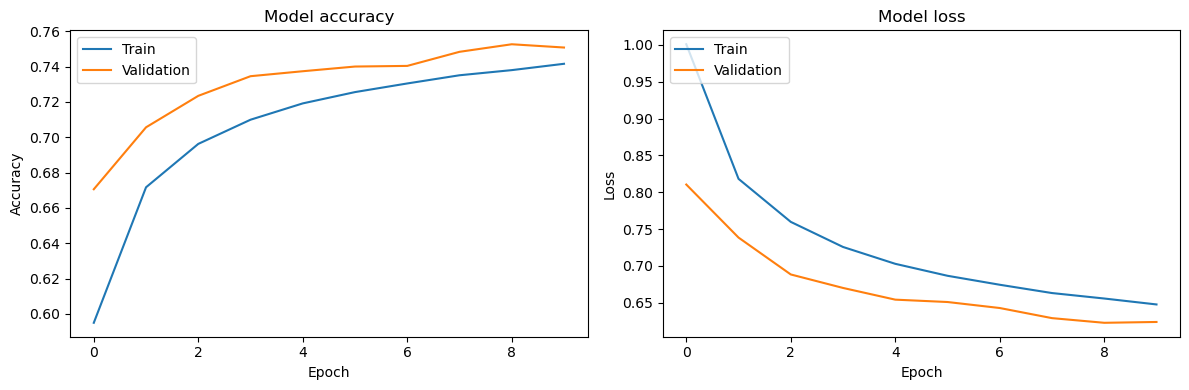

35321/35321 [==============================] - 31s 865us/step


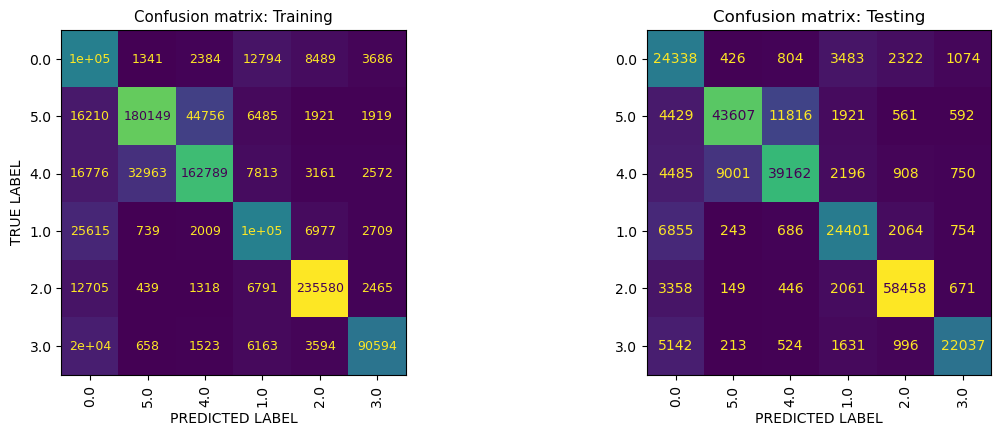

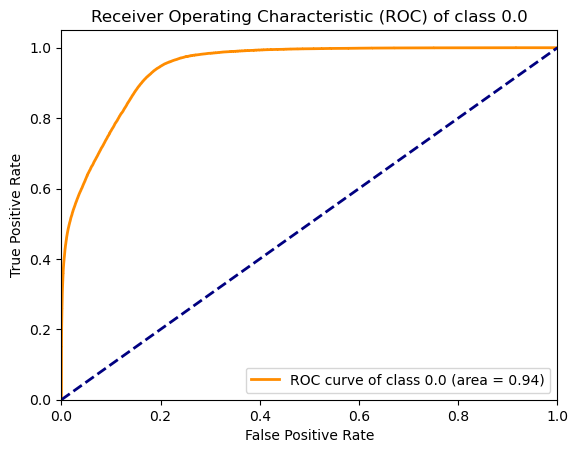

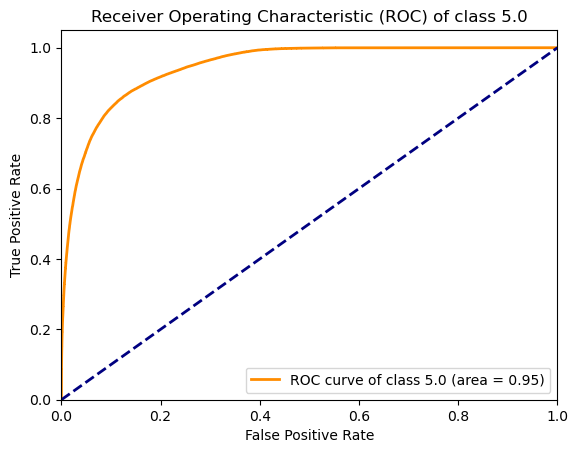

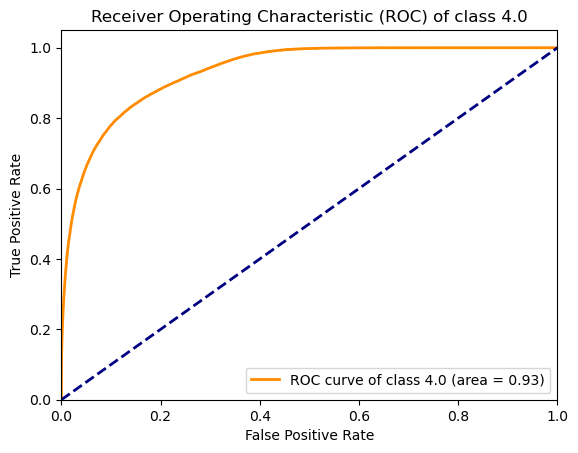

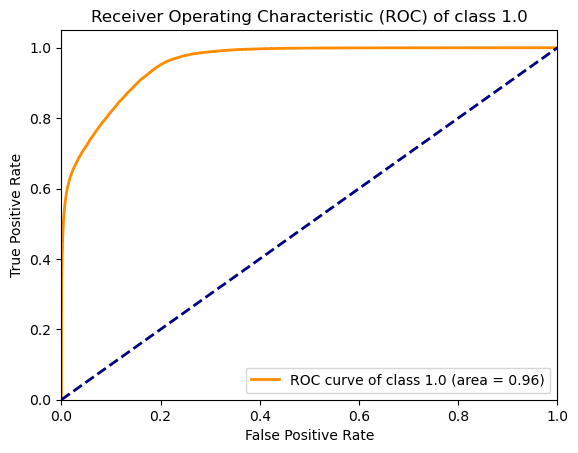

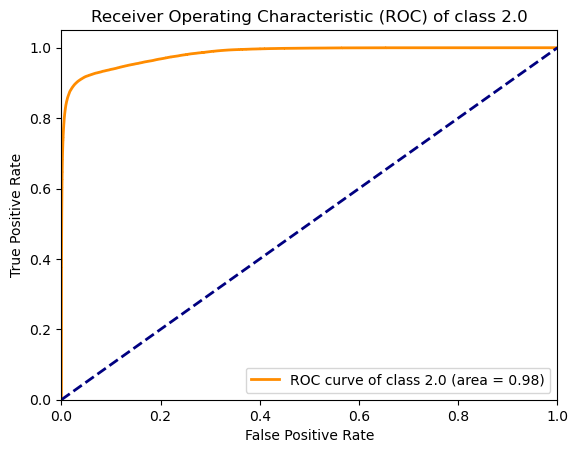

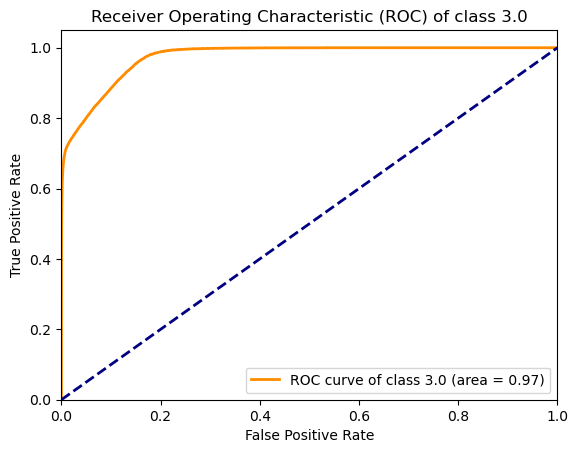

Accuracy: 0.7502831216998627
Confusion Matrix: 
[[24338   426   804  3483  2322  1074]
 [ 4429 43607 11816  1921   561   592]
 [ 4485  9001 39162  2196   908   750]
 [ 6855   243   686 24401  2064   754]
 [ 3358   149   446  2061 58458   671]
 [ 5142   213   524  1631   996 22037]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.75      0.60     32447
           1       0.81      0.69      0.75     62926
           2       0.73      0.69      0.71     56502
           3       0.68      0.70      0.69     35003
           4       0.90      0.90      0.90     65143
           5       0.85      0.72      0.78     30543

    accuracy                           0.75    282564
   macro avg       0.75      0.74      0.74    282564
weighted avg       0.77      0.75      0.75    282564

INFO:tensorflow:Assets written to: /Users/yongyiyang/Desktop/Capstone/script/cnn_model/assets


INFO:tensorflow:Assets written to: /Users/yongyiyang/Desktop/Capstone/script/cnn_model/assets


In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import os

def create_windows(data, window_size, step_size=1, with_label=True):
    windows, labels = [], []
    for i in range(0, len(data) - window_size + 1, step_size):
        window = data[i:i + window_size, :-1]
        windows.append(window)
        if with_label:
            label = np.bincount(data[i:i + window_size, -1].astype(int)).argmax()
            labels.append(label)
    return np.array(windows), np.array(labels)

def plot_cm(y_train, y_train_pred, y_test, y_test_pred, labels):
    y_train = np.argmax(y_train, axis=-1)
    y_test = np.argmax(y_test, axis=-1)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.7)
    plt.rc('font', size=9)
    cm_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], display_labels=labels)
    axs[0].set_title("Confusion matrix: Training")
    axs[0].set_xticklabels(labels, rotation=90)
    cm_train.im_.colorbar.remove()
    axs[0].set_ylabel('TRUE LABEL')
    axs[0].set_xlabel('PREDICTED LABEL')
    
    plt.rc('font', size=10)
    cm_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], display_labels=labels)
    axs[1].set_title("Confusion matrix: Testing")
    axs[1].set_xticklabels(labels, rotation=90)
    cm_test.im_.colorbar.remove()
    axs[1].set_ylabel('')
    axs[1].set_xlabel('PREDICTED LABEL')
    plt.show()

def optimized_train_eval_model(file_path, window_size=50, step_size=1, target='act', 
                               task='multi_class', positive_label=None, preprocess='standard', 
                               test_size=0.2, random_state=None, epochs=10, 
                               batch_size=32, save_model=False):
    dataset = pd.read_csv(file_path)
    
    if task == 'multi_class':
        data_with_labels = np.c_[dataset.drop(columns=[target]).values, 
                                pd.factorize(dataset[target])[0]]
    else:
        data_with_labels = np.c_[dataset.drop(columns=[target]).values, 
                                dataset[target].apply(lambda x: 1 if x == positive_label else 0).values]
    
    X, y = create_windows(data_with_labels, window_size, step_size)
    if task == 'multi_class':
        y = pd.get_dummies(y).values

    if preprocess == 'standard':
        X = np.array([StandardScaler().fit_transform(window) for window in X])
    elif preprocess == 'normal':
        X = np.array([MinMaxScaler().fit_transform(window) for window in X])
    
    X = np.expand_dims(X, axis=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128, kernel_size=(4, X_train.shape[2]), activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1] if task == 'multi_class' else 1, activation='softmax' if task == 'multi_class' else 'sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy' if task == 'multi_class' else 'binary_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1) if task == 'multi_class' else (y_pred_proba > 0.5).astype("int32")
    y_test_labels = np.argmax(y_test, axis=1) if task == 'multi_class' else y_test
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()
    
    acc = np.sum(y_pred == y_test_labels) / len(y_test_labels)
    ACT_LABELS = dataset[target].unique().tolist()
    plot_cm(y_train, np.argmax(model.predict(X_train), axis=1), y_test, y_pred, ACT_LABELS)
    
    # ROC Curve
    if task == 'multi_class':
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_train.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        for i, label in enumerate(ACT_LABELS):
            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve of class {label} (area = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic (ROC) of class {label}')
            plt.legend(loc="lower right")
            plt.show()

    else:  # binary classification
        fpr, tpr, _ = roc_curve(y_test_labels, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    print(f"Accuracy: {acc}")
    conf_mat = confusion_matrix(y_test_labels, y_pred)
    class_report = classification_report(y_test_labels, y_pred)
    print("Confusion Matrix: ")
    print(conf_mat)
    print("Classification Report: ")
    print(class_report)

    if save_model:
        model.save(os.path.join(os.getcwd(), 'cnn_model'))

    return acc, conf_mat, class_report

# Example usage:
file_path = 'data_with_noise.csv'
results = optimized_train_eval_model(file_path, target='act', task='multi_class', positive_label=None,
                                     preprocess='standard', test_size=0.2, 
                                     random_state=42, epochs=10, batch_size=32, 
                                     save_model=True)


In [8]:
# The way this method works is that for each active tag (identified by the act column), 
# it finds the mean and standard deviation of each sensor column. It then creates a mask to identify those 
# data points that are within ±0.4 standard deviations of the mean and sets them to NaN (i.e. removes these values), 
# thus introducing noise into the data. The purpose of this method is to simulate the situation of data corruption 
# or device failure.
import pandas as pd
import numpy as np
dataset = pd.read_csv('data_with_noise.csv')

# Function to clean data within each activity group
def clean_within_group(group):
    for column in group.columns:
        if column not in ["act", "id"]:  # Skip non-sensor columns
            mean = group[column].mean()
            std = group[column].std()
            mask = (group[column] > mean - 0.4*std) & (group[column] < mean + 0.4*std)
            group.loc[mask, column] = np.nan
    return group.dropna()

# Apply the cleaning function to each activity group
df_cleaned_by_activity = dataset.groupby('act').apply(clean_within_group).reset_index(drop=True)


df_cleaned_by_activity.to_csv('clean_by_average.csv', index=False)

Epoch 1/10
1944/1944 [==============================] - 7s 3ms/step - loss: 1.3431 - accuracy: 0.4620 - val_loss: 1.0995 - val_accuracy: 0.5682
Epoch 2/10
1944/1944 [==============================] - 7s 4ms/step - loss: 1.0377 - accuracy: 0.5889 - val_loss: 0.9036 - val_accuracy: 0.6355
Epoch 3/10
1944/1944 [==============================] - 7s 4ms/step - loss: 0.8977 - accuracy: 0.6439 - val_loss: 0.8083 - val_accuracy: 0.6732
Epoch 4/10
1944/1944 [==============================] - 7s 3ms/step - loss: 0.8081 - accuracy: 0.6789 - val_loss: 0.7452 - val_accuracy: 0.6917
Epoch 5/10
1944/1944 [==============================] - 7s 4ms/step - loss: 0.7410 - accuracy: 0.7087 - val_loss: 0.6844 - val_accuracy: 0.7242
Epoch 6/10
1944/1944 [==============================] - 7s 4ms/step - loss: 0.6853 - accuracy: 0.7304 - val_loss: 0.6556 - val_accuracy: 0.7336
Epoch 7/10
1944/1944 [==============================] - 7s 4ms/step - loss: 0.6285 - accuracy: 0.7555 - val_loss: 0.6182 - val_accuracy:

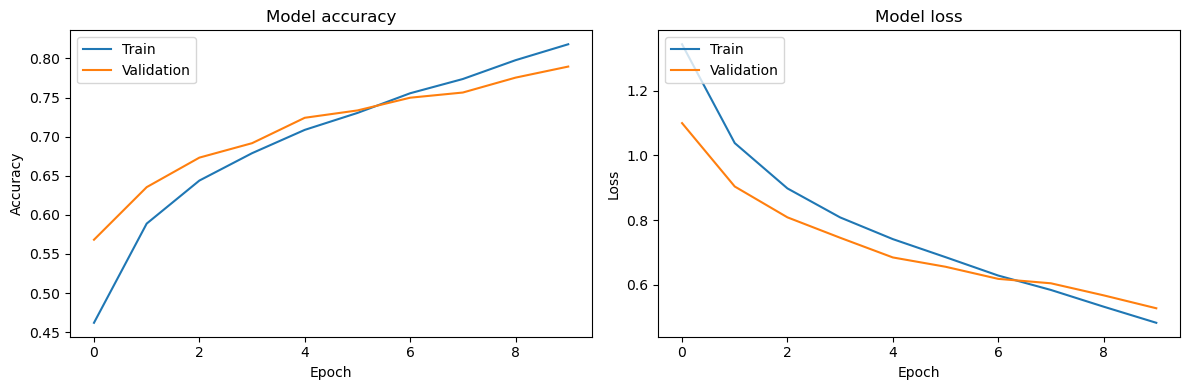

2430/2430 [==============================] - 4s 2ms/step


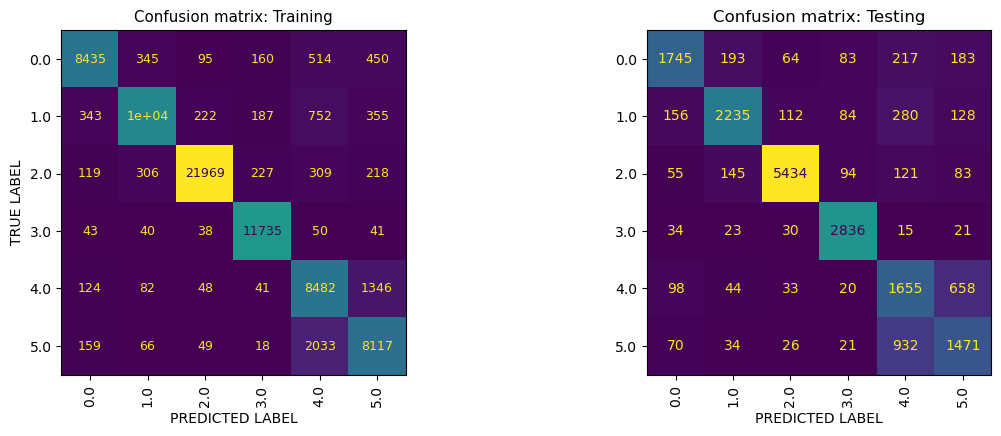

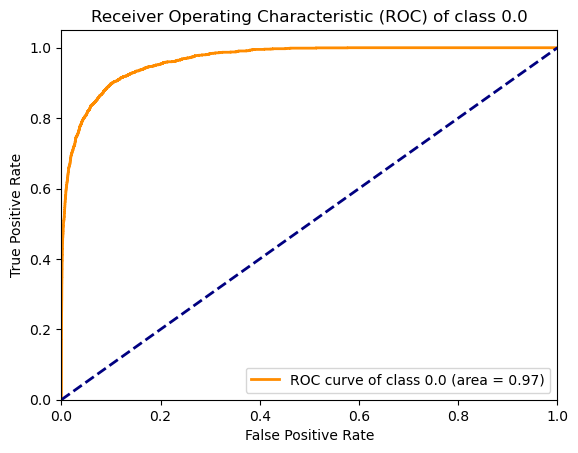

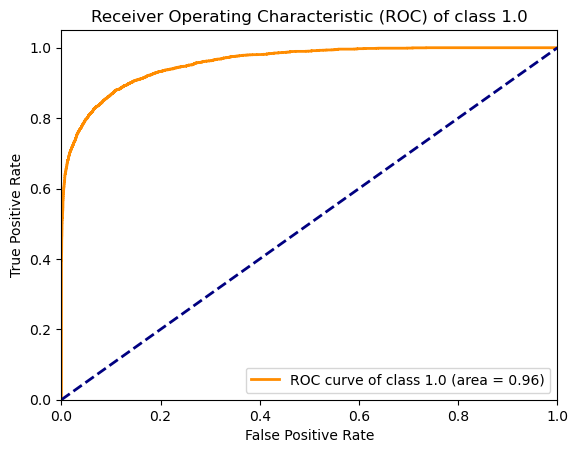

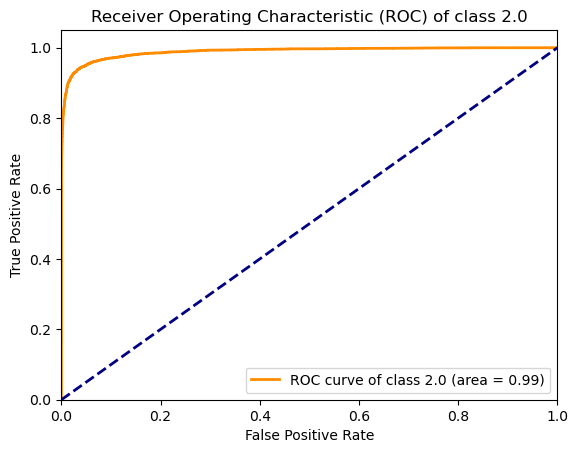

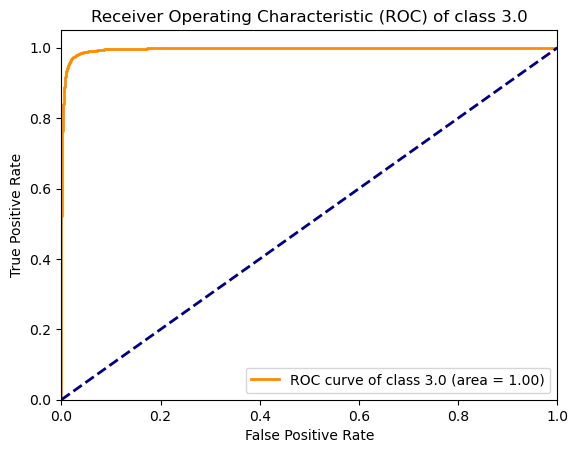

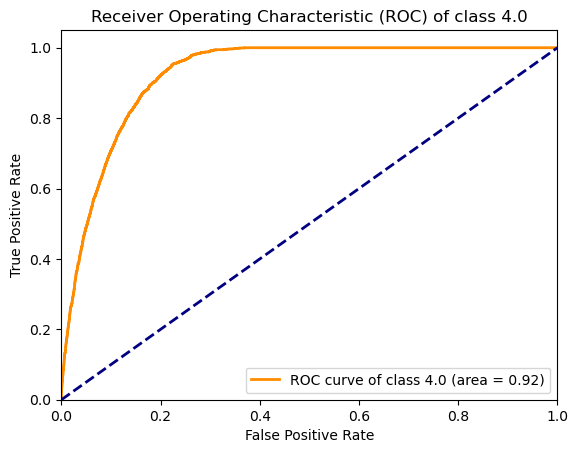

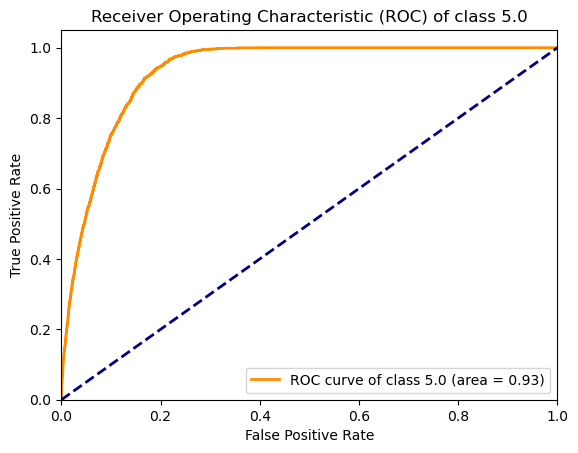

Accuracy: 0.7912314104873154
Confusion Matrix: 
[[1745  193   64   83  217  183]
 [ 156 2235  112   84  280  128]
 [  55  145 5434   94  121   83]
 [  34   23   30 2836   15   21]
 [  98   44   33   20 1655  658]
 [  70   34   26   21  932 1471]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      2485
           1       0.84      0.75      0.79      2995
           2       0.95      0.92      0.93      5932
           3       0.90      0.96      0.93      2959
           4       0.51      0.66      0.58      2508
           5       0.58      0.58      0.58      2554

    accuracy                           0.79     19433
   macro avg       0.77      0.76      0.76     19433
weighted avg       0.80      0.79      0.79     19433

INFO:tensorflow:Assets written to: /Users/yongyiyang/Desktop/Capstone/script/cnn_model/assets


INFO:tensorflow:Assets written to: /Users/yongyiyang/Desktop/Capstone/script/cnn_model/assets


In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import os

def create_windows(data, window_size, step_size=1, with_label=True):
    windows, labels = [], []
    for i in range(0, len(data) - window_size + 1, step_size):
        window = data[i:i + window_size, :-1]
        windows.append(window)
        if with_label:
            label = np.bincount(data[i:i + window_size, -1].astype(int)).argmax()
            labels.append(label)
    return np.array(windows), np.array(labels)

def plot_cm(y_train, y_train_pred, y_test, y_test_pred, labels):
    y_train = np.argmax(y_train, axis=-1)
    y_test = np.argmax(y_test, axis=-1)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.7)
    plt.rc('font', size=9)
    cm_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], display_labels=labels)
    axs[0].set_title("Confusion matrix: Training")
    axs[0].set_xticklabels(labels, rotation=90)
    cm_train.im_.colorbar.remove()
    axs[0].set_ylabel('TRUE LABEL')
    axs[0].set_xlabel('PREDICTED LABEL')
    
    plt.rc('font', size=10)
    cm_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], display_labels=labels)
    axs[1].set_title("Confusion matrix: Testing")
    axs[1].set_xticklabels(labels, rotation=90)
    cm_test.im_.colorbar.remove()
    axs[1].set_ylabel('')
    axs[1].set_xlabel('PREDICTED LABEL')
    plt.show()

def optimized_train_eval_model(file_path, window_size=50, step_size=1, target='act', 
                               task='multi_class', positive_label=None, preprocess='standard', 
                               test_size=0.2, random_state=None, epochs=10, 
                               batch_size=32, save_model=False):
    dataset = pd.read_csv(file_path)
    
    if task == 'multi_class':
        data_with_labels = np.c_[dataset.drop(columns=[target]).values, 
                                pd.factorize(dataset[target])[0]]
    else:
        data_with_labels = np.c_[dataset.drop(columns=[target]).values, 
                                dataset[target].apply(lambda x: 1 if x == positive_label else 0).values]
    
    X, y = create_windows(data_with_labels, window_size, step_size)
    if task == 'multi_class':
        y = pd.get_dummies(y).values

    if preprocess == 'standard':
        X = np.array([StandardScaler().fit_transform(window) for window in X])
    elif preprocess == 'normal':
        X = np.array([MinMaxScaler().fit_transform(window) for window in X])
    
    X = np.expand_dims(X, axis=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128, kernel_size=(4, X_train.shape[2]), activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1] if task == 'multi_class' else 1, activation='softmax' if task == 'multi_class' else 'sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy' if task == 'multi_class' else 'binary_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1) if task == 'multi_class' else (y_pred_proba > 0.5).astype("int32")
    y_test_labels = np.argmax(y_test, axis=1) if task == 'multi_class' else y_test
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()
    
    acc = np.sum(y_pred == y_test_labels) / len(y_test_labels)
    ACT_LABELS = dataset[target].unique().tolist()
    plot_cm(y_train, np.argmax(model.predict(X_train), axis=1), y_test, y_pred, ACT_LABELS)
    
    # ROC Curve
    if task == 'multi_class':
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_train.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        for i, label in enumerate(ACT_LABELS):
            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve of class {label} (area = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic (ROC) of class {label}')
            plt.legend(loc="lower right")
            plt.show()

    else:  # binary classification
        fpr, tpr, _ = roc_curve(y_test_labels, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    print(f"Accuracy: {acc}")
    conf_mat = confusion_matrix(y_test_labels, y_pred)
    class_report = classification_report(y_test_labels, y_pred)
    print("Confusion Matrix: ")
    print(conf_mat)
    print("Classification Report: ")
    print(class_report)

    if save_model:
        model.save(os.path.join(os.getcwd(), 'cnn_model'))

    return acc, conf_mat, class_report

# Example usage:
file_path = 'clean_by_average.csv'
results = optimized_train_eval_model(file_path, target='act', task='multi_class', positive_label=None,
                                     preprocess='standard', test_size=0.2, 
                                     random_state=42, epochs=10, batch_size=32, 
                                     save_model=True)

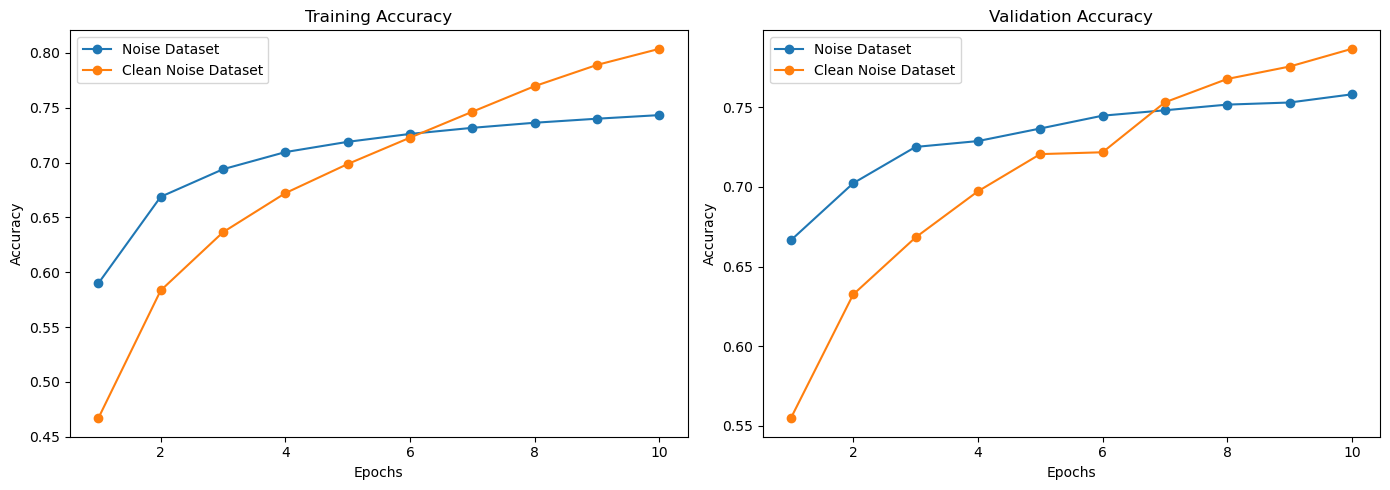

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to create sliding windows
def create_windows(data, window_size, step_size=1):
    windows, labels = [], []
    for i in range(0, len(data) - window_size + 1, step_size):
        window = data[i:i + window_size, :-1]
        windows.append(window)
        label = np.bincount(data[i:i + window_size, -1].astype(int)).argmax()
        labels.append(label)
    return np.array(windows), np.array(labels)

# Function to train the model and get accuracies
def train_model_get_accuracy(file_path, epochs=10):
    dataset = pd.read_csv(file_path)
    data_with_labels = np.c_[dataset.drop(columns=['act']).values, pd.factorize(dataset['act'])[0]]
    X, y = create_windows(data_with_labels, window_size=50, step_size=1)
    y = pd.get_dummies(y).values
    X = np.array([StandardScaler().fit_transform(window) for window in X])
    X = np.expand_dims(X, axis=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128, kernel_size=(4, X_train.shape[2]), activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
    return history.history['accuracy'], history.history['val_accuracy']

# Paths to the datasets
noise_added_file_path = 'data_with_noise.csv'
cleaned_noise_file_path = 'clean_by_average.csv'

# Training on both datasets
noise_added_train_acc, noise_added_val_acc = train_model_get_accuracy(noise_added_file_path)
cleaned_noise_train_acc, cleaned_noise_val_acc = train_model_get_accuracy(cleaned_noise_file_path)

epochs_range = range(1, 11)

# Plotting
plt.figure(figsize=(14, 5))

# Training accuracies
plt.subplot(1, 2, 1)
plt.plot(epochs_range, noise_added_train_acc, marker='o', label='Noise Dataset')
plt.plot(epochs_range, cleaned_noise_train_acc, marker='o', label='Clean Noise Dataset')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs_range, noise_added_val_acc, marker='o', label='Noise Dataset')
plt.plot(epochs_range, cleaned_noise_val_acc, marker='o', label='Clean Noise Dataset')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


/Users/yongyiyang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


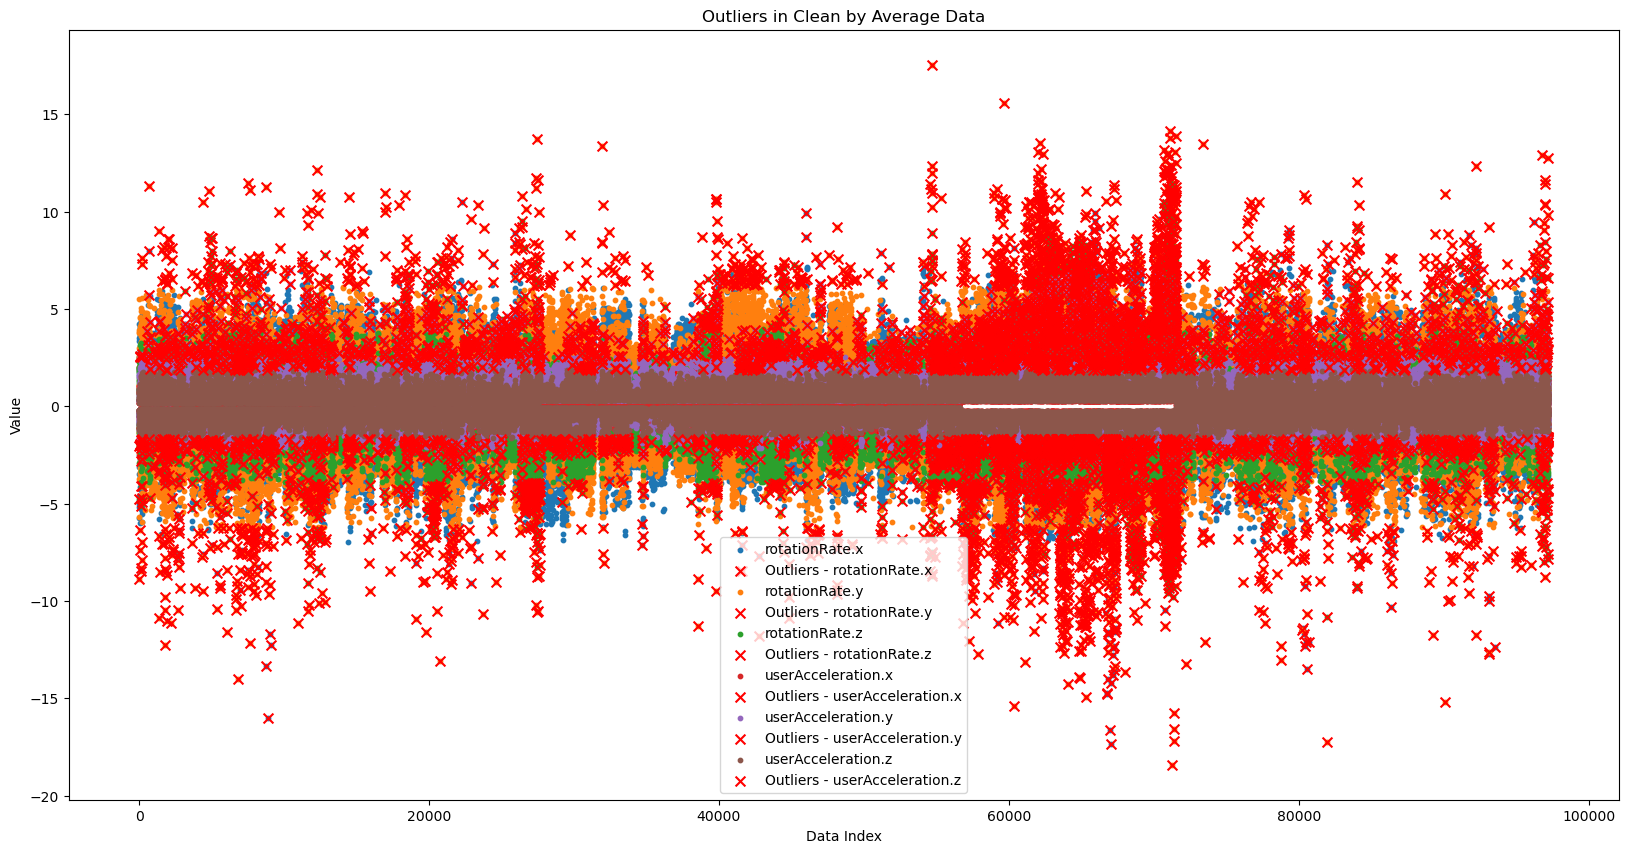

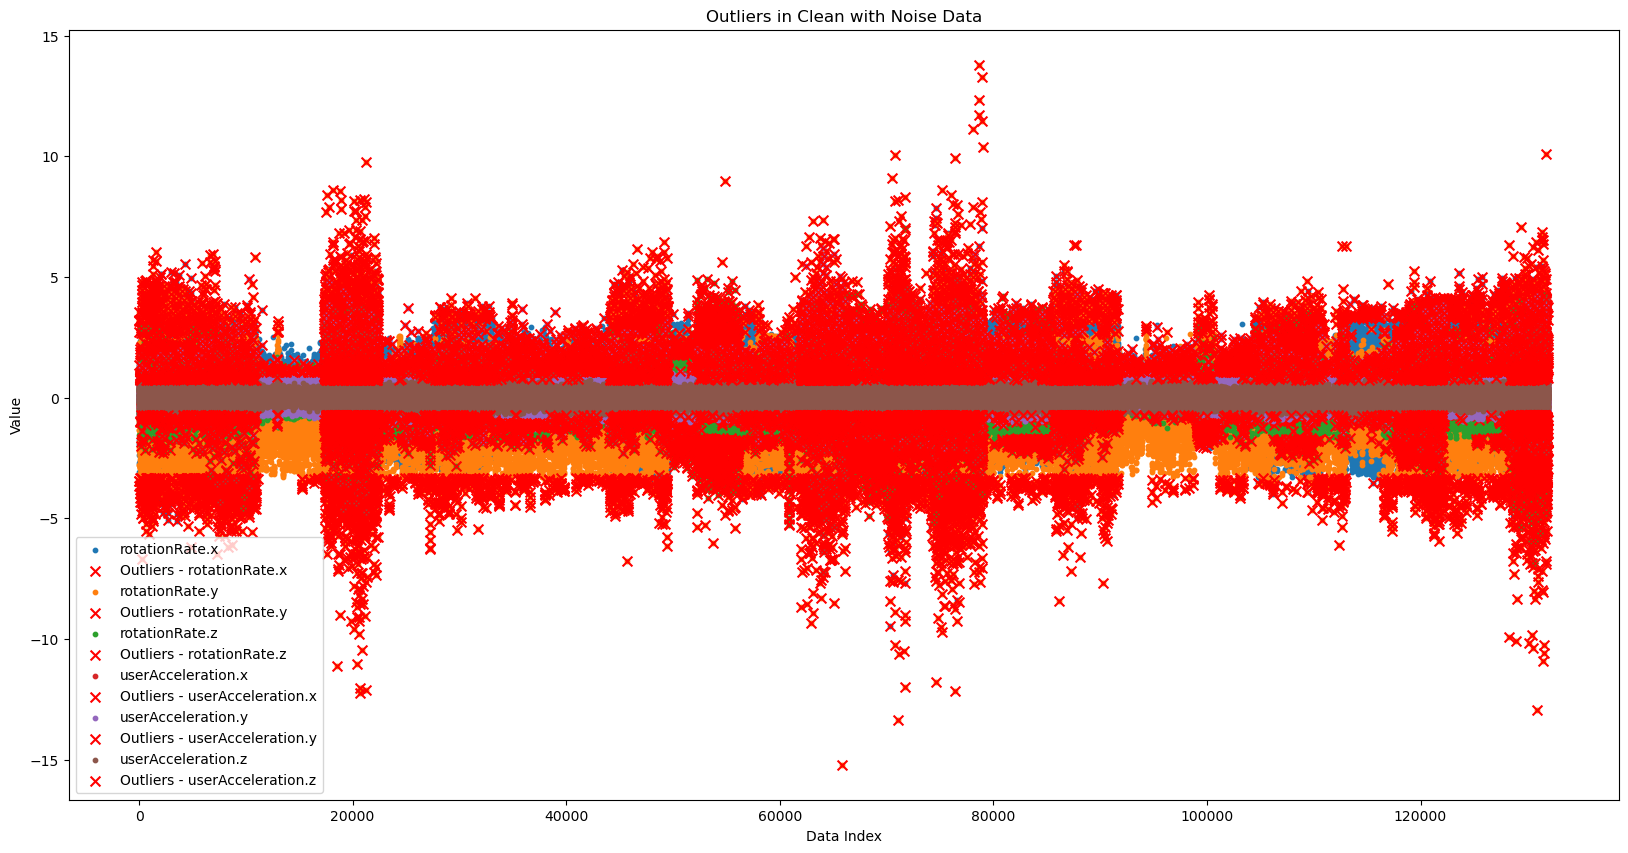

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
clean_by_average = pd.read_csv('clean_by_average.csv')
clean_with_noise = pd.read_csv('clean_with_noise.csv')

# Drop the 'act' and 'id' columns as they are not key information for outlier detection
clean_by_average = clean_by_average.drop(columns=['act', 'id'], errors='ignore')
clean_with_noise = clean_with_noise.drop(columns=['act', 'id'], errors='ignore')

# A function to detect outliers based on IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

# Detect outliers for each dataset and each column
outliers_clean_by_average = clean_by_average.apply(detect_outliers)
outliers_clean_with_noise = clean_with_noise.apply(detect_outliers)

# A function to plot outliers for a given dataset and title
def plot_outliers(data, outliers, title):
    plt.figure(figsize=(20, 10))
    for column in data.columns:
        plt.scatter(data.index, data[column], label=column, s=10)
        plt.scatter(data.index[outliers[column]], data[column][outliers[column]], 
                    color='red', label=f"Outliers - {column}", s=50, marker="x")
    plt.legend()
    plt.title(title)
    plt.xlabel('Data Index')
    plt.ylabel('Value')
    plt.show()

# Plot outliers for each dataset
plot_outliers(clean_by_average, outliers_clean_by_average, "Outliers in Clean by Average Data")
plot_outliers(clean_with_noise, outliers_clean_with_noise, "Outliers in Clean with Noise Data")
